In [1]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Anisha Ray\OneDrive\Desktop\py-master\ML\18_PCA\Exercise\heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


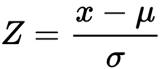

In [5]:
df1 = df[df.Cholesterol>(df.Cholesterol.mean()+3*df.Cholesterol.std())]

In [6]:
df[df.FastingBS>(df.FastingBS.mean()+3*df.FastingBS.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [7]:
df[df.MaxHR>(df.MaxHR.mean()+3*df.MaxHR.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [9]:
df2 = df[df.Oldpeak>(df.Oldpeak.mean()+3*df.Oldpeak.std())]

In [10]:
df[df.HeartDisease>(df.HeartDisease.mean()+3*df.HeartDisease.std())]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [12]:
df3 = df[df.RestingBP>(df.RestingBP.mean()+3*df.RestingBP.std())]

In [13]:
df.Sex.unique()

array(['M', 'F'], dtype=object)

In [14]:
df.ChestPainType.unique()

array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [15]:
df.RestingECG.unique()

array(['Normal', 'ST', 'LVH'], dtype=object)

In [16]:
df.ExerciseAngina.unique()

array(['N', 'Y'], dtype=object)

In [17]:
df.ST_Slope.unique()

array(['Up', 'Flat', 'Down'], dtype=object)

In [18]:
dataset = df3.copy()
dataset.Sex.replace(
{
    'M': 1, 'F':0
}, inplace=True)
dataset.ChestPainType.replace(
{
    'ATA': 1, 'NAP':2, 'ASY':3, 'TA':4
}, inplace=True)
dataset.RestingECG.replace(
{
    'Normal': 1, 'ST':2, 'LVH':3
}, inplace=True)
dataset.ExerciseAngina.replace(
{
    'N': 1, 'Y':0
}, inplace=True)
dataset.ST_Slope.replace(
{
    'Up': 1, 'Flat':2, 'Down':3
}, inplace=True)

In [19]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,1,1,190,241,0,1,106,1,0.0,1,0
241,54,1,3,200,198,0,1,142,0,2.0,2,1
365,64,0,3,200,0,0,1,140,0,1.0,2,1
399,61,1,2,200,0,1,2,70,1,0.0,2,1
592,61,1,3,190,287,1,3,150,0,2.0,3,1


In [20]:
X=dataset.drop(['HeartDisease'],axis='columns')
y = dataset['HeartDisease']

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled= scaler.fit_transform(X)
X_scaled

array([[-2.16604969,  0.63245553, -1.45999279, -1.28759261,  0.46070848,
        -0.8660254 , -1.08012345, -0.77474902,  1.15470054, -0.92827912,
        -1.32287566],
       [-0.20540126,  0.63245553,  0.81110711,  0.85839508,  0.10513604,
        -0.8660254 , -1.08012345,  0.23162599, -0.8660254 ,  0.51571062,
         0.        ],
       [ 1.10169769, -1.58113883,  0.81110711,  0.85839508, -1.53215102,
        -0.8660254 , -1.08012345,  0.17571627, -0.8660254 , -0.20628425,
         0.        ],
       [ 0.709568  ,  0.63245553, -0.32444284,  0.85839508, -1.53215102,
         1.15470054,  0.        , -1.78112403,  1.15470054, -0.92827912,
         0.        ],
       [ 0.709568  ,  0.63245553,  0.81110711, -1.28759261,  0.8410883 ,
         1.15470054,  1.08012345,  0.45526489, -0.8660254 ,  0.51571062,
         1.32287566],
       [ 0.05601853, -1.58113883,  0.81110711,  0.85839508,  0.84935743,
         1.15470054,  1.08012345, -0.01996776, -0.8660254 ,  1.95970037,
         1.322

In [22]:
from sklearn.decomposition import PCA
pca = PCA(0.95)  # retain 95% of useful features
X_pca = pca.fit_transform(X_scaled)
X_pca.shape

(7, 5)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca,y,test_size=0.2,random_state=30)

In [34]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [35]:
model1 = LogisticRegression()
model1.fit(X_train, y_train)
model1.score(X_test,y_test)

1.0

In [38]:
model2=svm.SVC(kernel='linear')
model2.fit(X_train,y_train)
model2.score(X_test,y_test)

1.0

In [39]:
model3=RandomForestClassifier(max_depth=3)
model3.fit(X_train,y_train)
model3.score(X_test,y_test)

1.0